In [360]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, confusion_matrix, ConfusionMatrixDisplay, classification_report
from prettytable import PrettyTable
import re
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
%matplotlib inline



In [361]:
import warnings

# Ignore the specific FutureWarning related to 'use_inf_as_na'
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated and will be removed in a future version")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [362]:
# Importing train dataset
df_train = pd.read_csv("train.csv")

# Importing test dataset
df_test = pd.read_csv("test.csv")

In [363]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [364]:
#Looking data format and types
print("----------Train Data----------")
print(df.info())


----------Train Data----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       0 non-null      float64
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Fsize     1309 non-null   int64  
 8   Single    1309 non-null   int64  
 9   SmallF    1309 non-null   int64  
 10  MedF      1309 non-null   int64  
 11  LargeF    1309 non-null   int64  
 12  Title_0   1309 non-null   bool   
 13  Title_1   1309 non-null   bool   
 14  Title_2   1309 non-null   bool   
 15  Title_3   1309 non-null   bool   
 16  Em_C      1309 non-null   bool   
 17  Em_Q      1309 non-null   bool   
 18  Em_S      1309 non-null   bool   
dtypes: bool(7), float64(4), int64(8)
memor

In [365]:
## Join train and test datasets in order to obtain the same number of features during categorical conversion
train_len = len(df_train)
df =  pd.concat(objs=[df_train, df_test], axis=0).reset_index(drop=True)

In [366]:
# drop unnecessary columns
df = df.drop(columns=['PassengerId', 'Cabin', 'Ticket'], errors='ignore')


In [367]:
# Fill empty and NaNs values with NaN
df = df.fillna(np.nan)

# Check for Null values
df.isnull().sum()

,0
Survived,418
Pclass,0
Name,0
Sex,0
Age,263
SibSp,0
Parch,0
Fare,1
Embarked,2


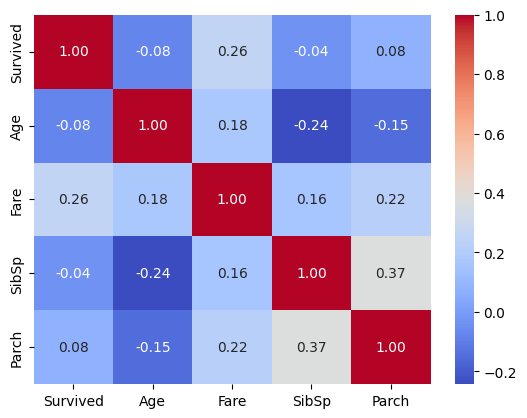

In [368]:
# Correlation matrix between numerical values and Survived
g = sns.heatmap(df[["Survived","Age","Fare","SibSp","Parch"]].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")


Fare feature seems to have a significative correlation with the survival probability.



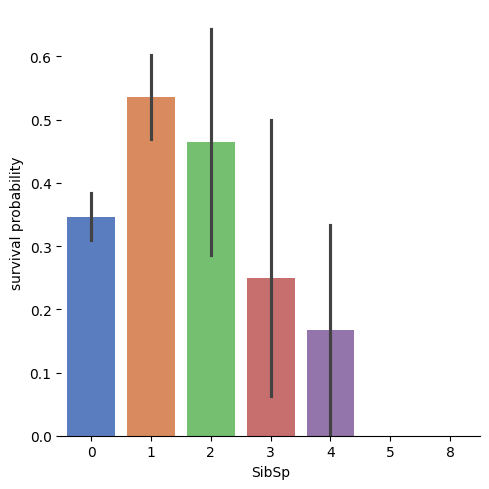

In [369]:
g = sns.catplot(x="SibSp", y="Survived", data=df, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passengers having a lot of siblings/spouses have less chance to survive



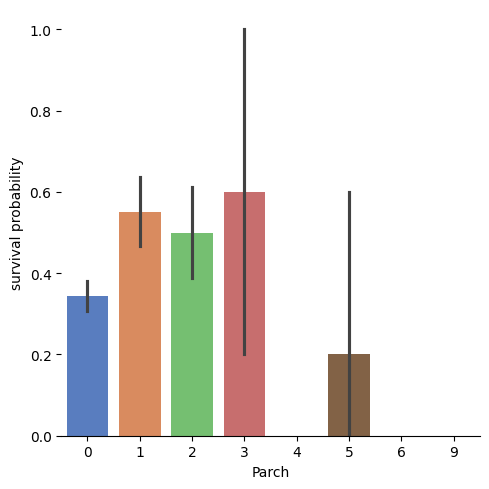

In [370]:
# Explore Parch feature vs Survived
g = sns.catplot(x="Parch", y="Survived", data=df, kind="bar", palette="muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")

Small families have more chance to survive, more than single (Parch 0), medium (Parch 3,4) and large families (Parch 5,6 ).



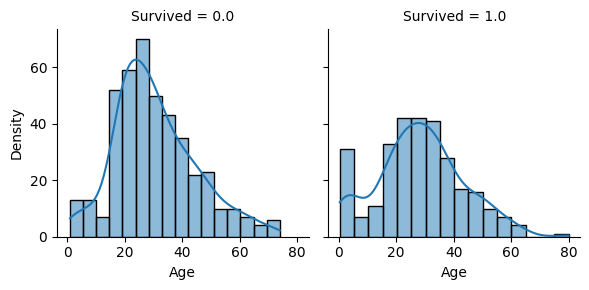

In [371]:
g = sns.FacetGrid(df, col='Survived')
g.map(sns.histplot, "Age", kde=True)
g.set_axis_labels("Age", "Density")
plt.show()


It seems that very young passengers have more chance to survive.



In [372]:
df["Embarked"].value_counts()


,count
Embarked,
S,914
C,270
Q,123


In [373]:
#Fill Embarked nan values of dataset set with 'S' most frequent value
df["Embarked"] = df["Embarked"].fillna("S")

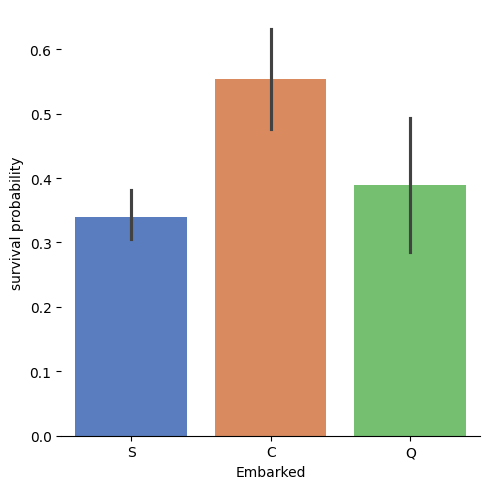

In [374]:
# Explore Embarked vs Survived
g = sns.catplot(x="Embarked", y="Survived", data=df, kind="bar", palette="muted")

g.despine(left=True)
g = g.set_ylabels("survival probability")

It seems that passenger coming from Cherbourg (C) have more chance to survive.

# Feature engineering

In [376]:
# Get Title from Name
dataset_title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df["Title"] = pd.Series(dataset_title)
df["Title"].head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


The Name feature contains information on passenger's title.



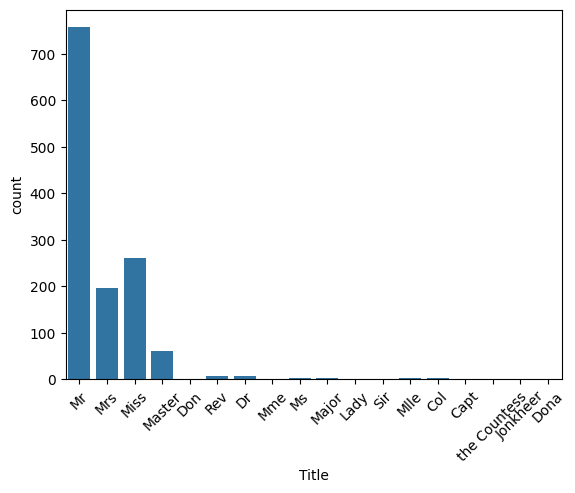

In [377]:
g = sns.countplot(x="Title",data=df)
g = plt.setp(g.get_xticklabels(), rotation=45)

There is 17 titles in the dataset, most of them are very rare and we can group them in 4 categories.



In [378]:
# Convert to categorical values Title
df["Title"] = df["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df["Title"] = df["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Rare":3})
df["Title"] = df[["Title"]].astype(int)

In [379]:
df["Title"]

,Title
0,2
1,1
2,1
3,1
4,2
...,...
1304,2
1305,3
1306,2
1307,2


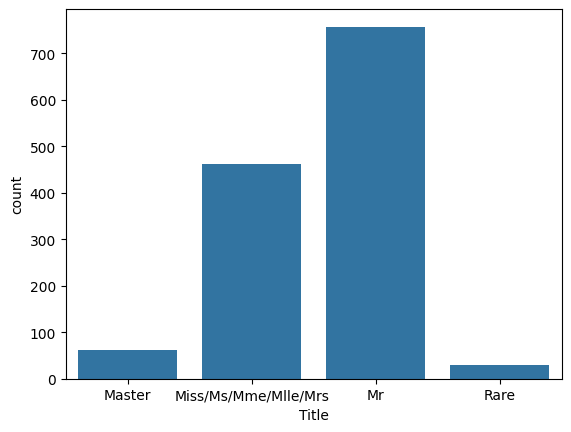

In [380]:
g = sns.countplot(data = df1, x  ="Title")
g.set_xticks(range(4))
g = g.set_xticklabels(["Master","Miss/Ms/Mme/Mlle/Mrs","Mr","Rare"])

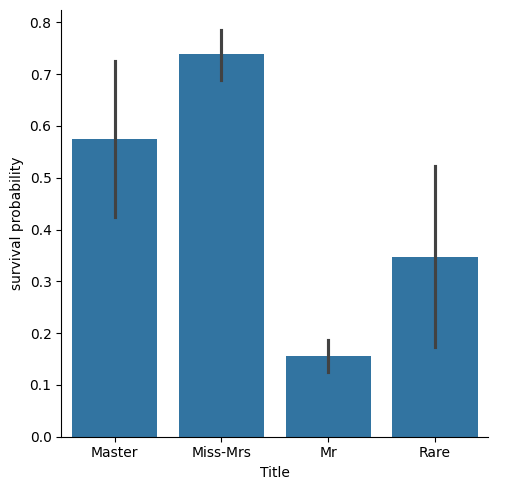

In [381]:
g = sns.catplot(x="Title",y="Survived",data=df,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Rare"])
g = g.set_ylabels("survival probability")

In [382]:
# Drop Name variable
df.drop(labels = ["Name"], axis = 1, inplace = True)


In [383]:
#family size
df["Fsize"] = df["SibSp"] + df["Parch"] + 1

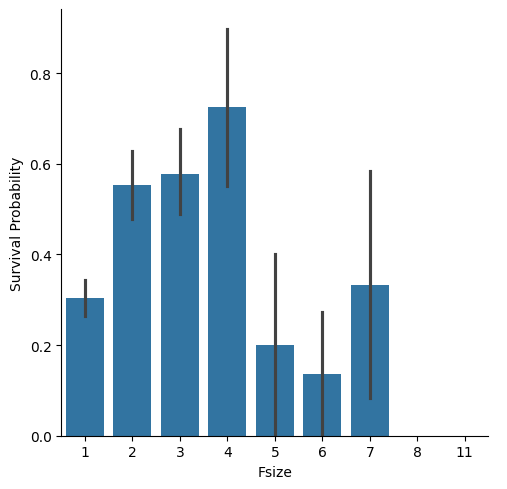

In [384]:
g = sns.catplot(x="Fsize", y="Survived", data=df, kind="bar")

g.ax.set_ylabel("Survival Probability")

plt.show()

The family size seems to play an important role, survival probability is worst for large families.

In [385]:
# Create new feature of family size
df['Single'] = df['Fsize'].map(lambda s: 1 if s == 1 else 0)
df['SmallF'] = df['Fsize'].map(lambda s: 1 if  s == 2  else 0)
df['MedF'] = df['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
df['LargeF'] = df['Fsize'].map(lambda s: 1 if s >= 5 else 0)

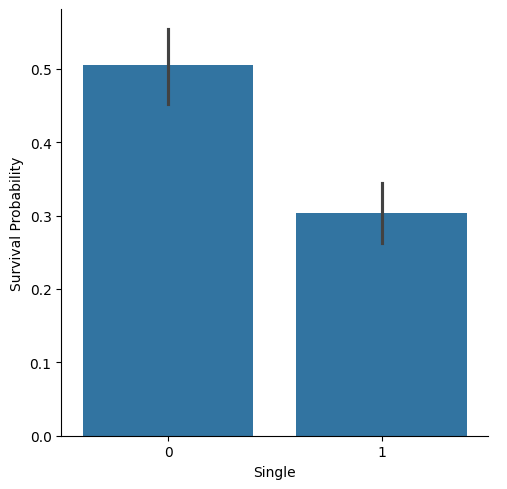

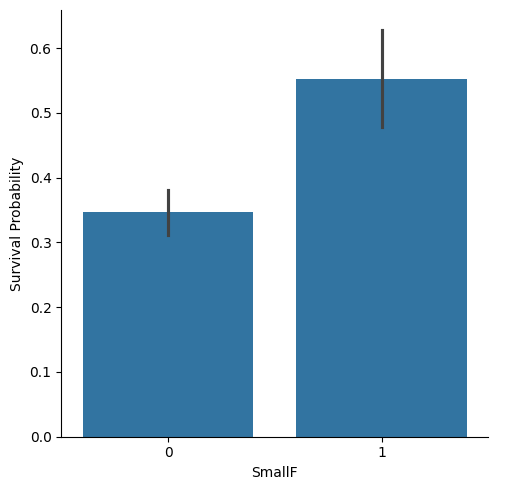

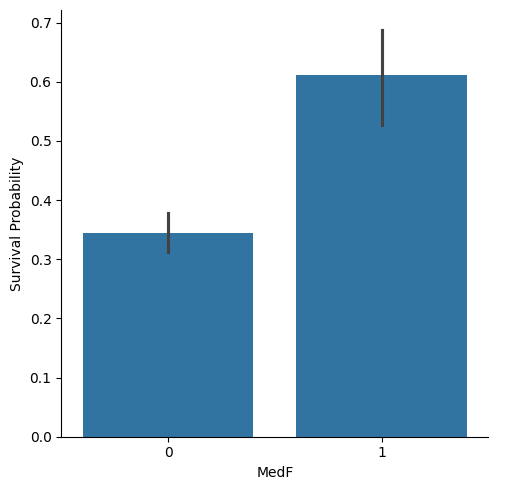

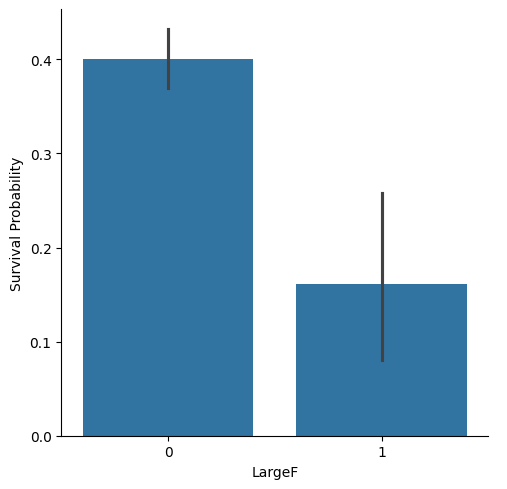

In [386]:
g = sns.catplot(x="Single",y="Survived",data=df,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="SmallF",y="Survived",data=df,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="MedF",y="Survived",data=df,kind="bar")
g = g.set_ylabels("Survival Probability")
g = sns.catplot(x="LargeF",y="Survived",data=df,kind="bar")
g = g.set_ylabels("Survival Probability")

Factorplots of family size categories show that Small and Medium families have more chance to survive than single passenger and large families.

In [387]:
# convert to indicator values Title and Embarked
df = pd.get_dummies(df, columns = ["Title"])
df = pd.get_dummies(df, columns = ["Embarked"], prefix="Em")

In [388]:
#convert sex to 1 and 0
df["Sex"] = df["Sex"].map({"male": 0, "female":1})
# fill nan with median in age col
df['Age'] = df['Age'].fillna(df['Age'].median())

# ML Modelling

In [389]:

X_train = df[:train_len].drop(labels="Survived", axis=1)
y_train = df[:train_len]["Survived"]


since the "Survived" col in X_test cannot be seen I split X_train into train and val set.

In [390]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [391]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


In [396]:
lr_model = LogisticRegression(random_state=42, max_iter=1000)

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 0.1}
Best cross-validation score: 0.828612232837585


In [397]:
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.8243967300305328
